In [3]:
from __future__ import print_function
import torch
from torch.autograd import Variable, Function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from est_entro import est_entro_JVHW, est_entro_MLE, formalize_sample, fingerprint
from minimax_entropy import MinimaxEntropyEstimator

In [2]:
est = MinimaxEntropyEstimator('poly_coeff_entro.mat')
pmf_p = [0.1, 0.9]
dist_p = Variable(torch.from_numpy(np.array(pmf_p)), requires_grad=True)

pmf_q = [0., 1.]
dist_q = Variable(torch.from_numpy(np.array(pmf_q)), requires_grad=True)

H_pq = est.cross_entro(dist_p, dist_q)
print("mle cross entropy: {}".format(H_pq.data))

H_pq_mm = est.minimax_cross_entro(dist_p, dist_q, 10)
print("minimax cross entropy: {}".format(H_pq_mm.data))

H_pq_mm.backward()
dist_p.grad

mle cross entropy: 
 0.1520
[torch.DoubleTensor of size 1]

minimax cross entropy: 
 0.1600
[torch.DoubleTensor of size 1]



Variable containing:
 0.0000
-1.6920
[torch.DoubleTensor of size 2]

In [3]:
est = MinimaxEntropyEstimator('poly_coeff_entro.mat')
pmf = [0.2, 0.2, 0.6]
dist = Variable(torch.from_numpy(np.array(pmf)), requires_grad=True)

n = 10
H_mm = est.minimax_entro(dist, n)
H = est.entro(dist)
print('minimax entropy: {}'.format(H_mm.data))
print('mle entropy: {}'.format(H.data))

samp = []
for i, f in enumerate(pmf):
    samp += [i] * int(f * n)
samp = np.array(samp)
print('JVHW entropy: {}'.format(est_entro_JVHW(samp)))
print('MLE entropy: {}'.format(est_entro_MLE(samp)))

minimax entropy: 
 1.3876
[torch.DoubleTensor of size 1]

mle entropy: 
 1.3710
[torch.DoubleTensor of size 1]

JVHW entropy: [ 1.58735485]
MLE entropy: [ 1.37095059]


/home/jacky/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/jacky/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


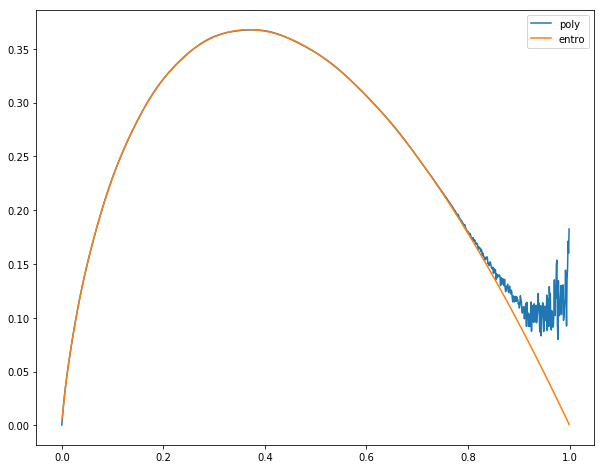

In [130]:
d = -1
ps = np.arange(0, 1, 0.001)
f_ps = np.array([np.polyval(poly_entro[d][0].flatten()[::-1], p) for p in ps])
h_ps = np.array([-p*np.log(p) for p in ps])
plt.figure(figsize=(10,8))
plt.plot(ps, f_ps, label='poly')
plt.plot(ps, h_ps, label='entro')
plt.legend()